Dataset shape: (2000, 64, 64)

=== Face 1 ===
Original size: 64 x 64 = 4096 values
SVD k=5: Compressed Size=645, Ratio=0.1575
PCA k=5: Compressed Size=640, Ratio=0.1562
SVD k=20: Compressed Size=2580, Ratio=0.6299
PCA k=20: Compressed Size=2560, Ratio=0.6250
SVD k=50: Compressed Size=6450, Ratio=1.5747
PCA k=50: Compressed Size=6400, Ratio=1.5625
SVD k=100: Compressed Size=12900, Ratio=3.1494
PCA k=100: Compressed Size=12800, Ratio=3.1250


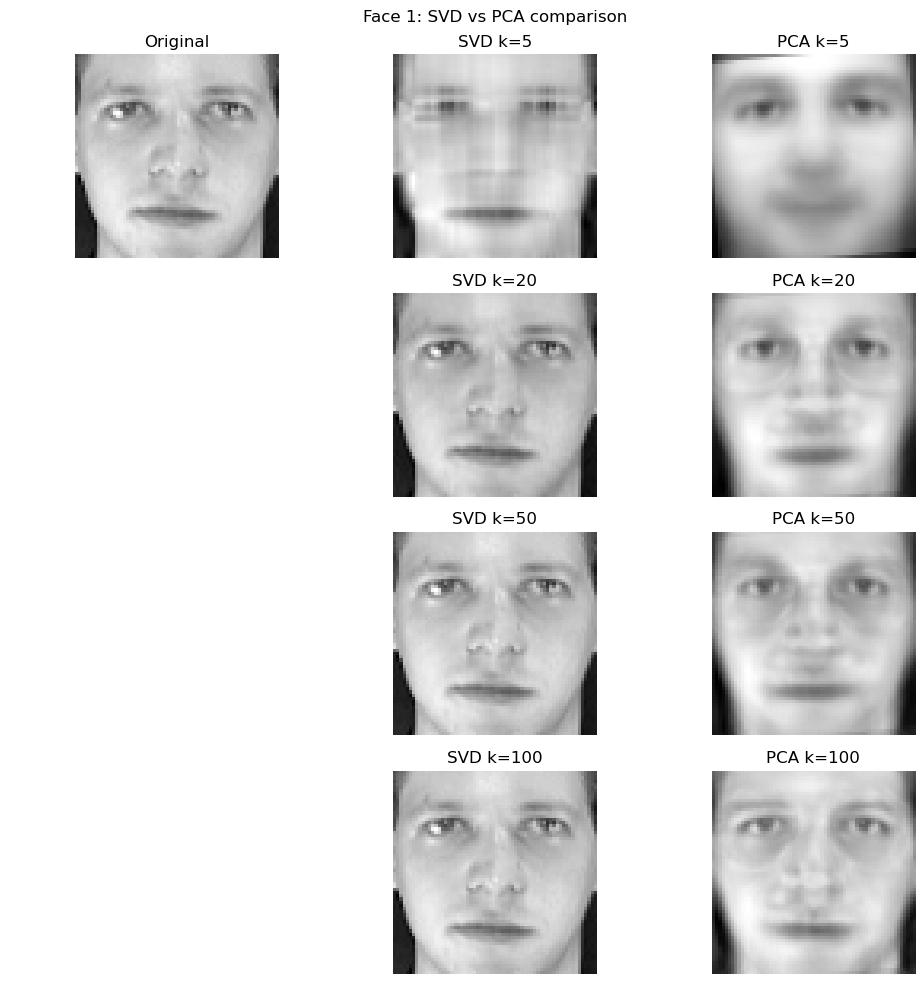


=== Face 2 ===
Original size: 64 x 64 = 4096 values
SVD k=5: Compressed Size=645, Ratio=0.1575
PCA k=5: Compressed Size=640, Ratio=0.1562
SVD k=20: Compressed Size=2580, Ratio=0.6299
PCA k=20: Compressed Size=2560, Ratio=0.6250
SVD k=50: Compressed Size=6450, Ratio=1.5747
PCA k=50: Compressed Size=6400, Ratio=1.5625
SVD k=100: Compressed Size=12900, Ratio=3.1494
PCA k=100: Compressed Size=12800, Ratio=3.1250


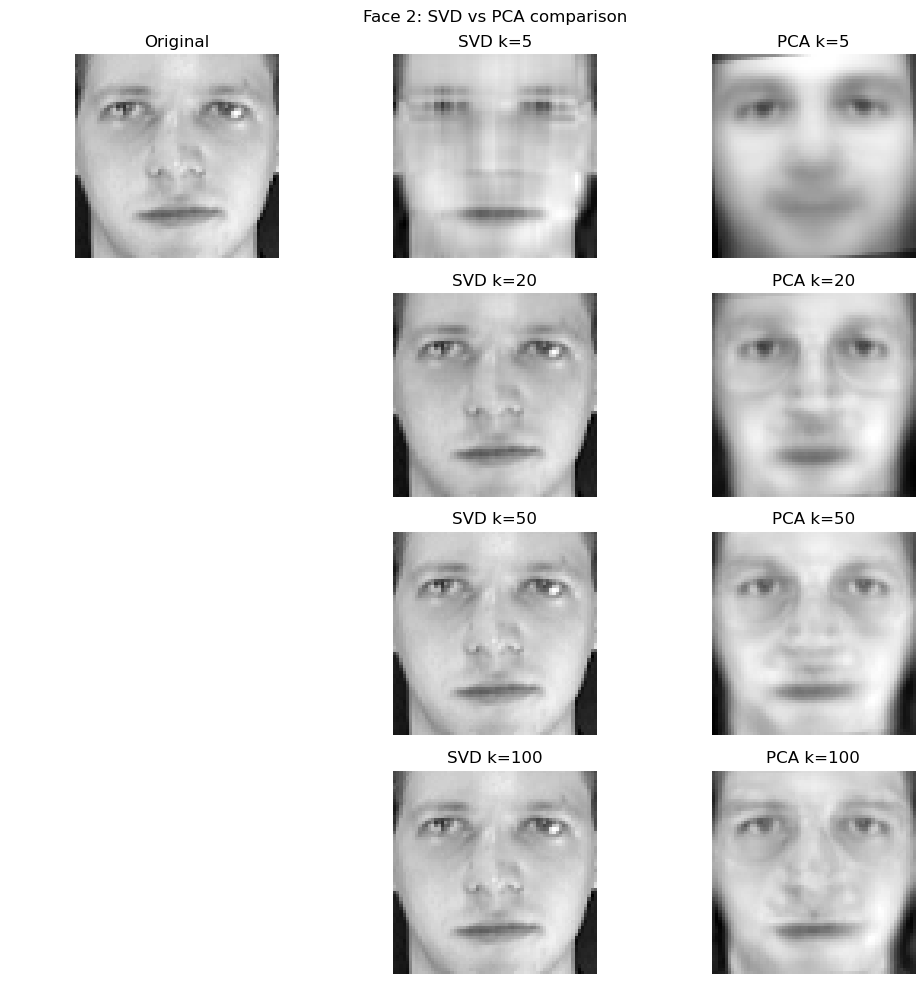


=== Face 3 ===
Original size: 64 x 64 = 4096 values
SVD k=5: Compressed Size=645, Ratio=0.1575
PCA k=5: Compressed Size=640, Ratio=0.1562
SVD k=20: Compressed Size=2580, Ratio=0.6299
PCA k=20: Compressed Size=2560, Ratio=0.6250
SVD k=50: Compressed Size=6450, Ratio=1.5747
PCA k=50: Compressed Size=6400, Ratio=1.5625
SVD k=100: Compressed Size=12900, Ratio=3.1494
PCA k=100: Compressed Size=12800, Ratio=3.1250


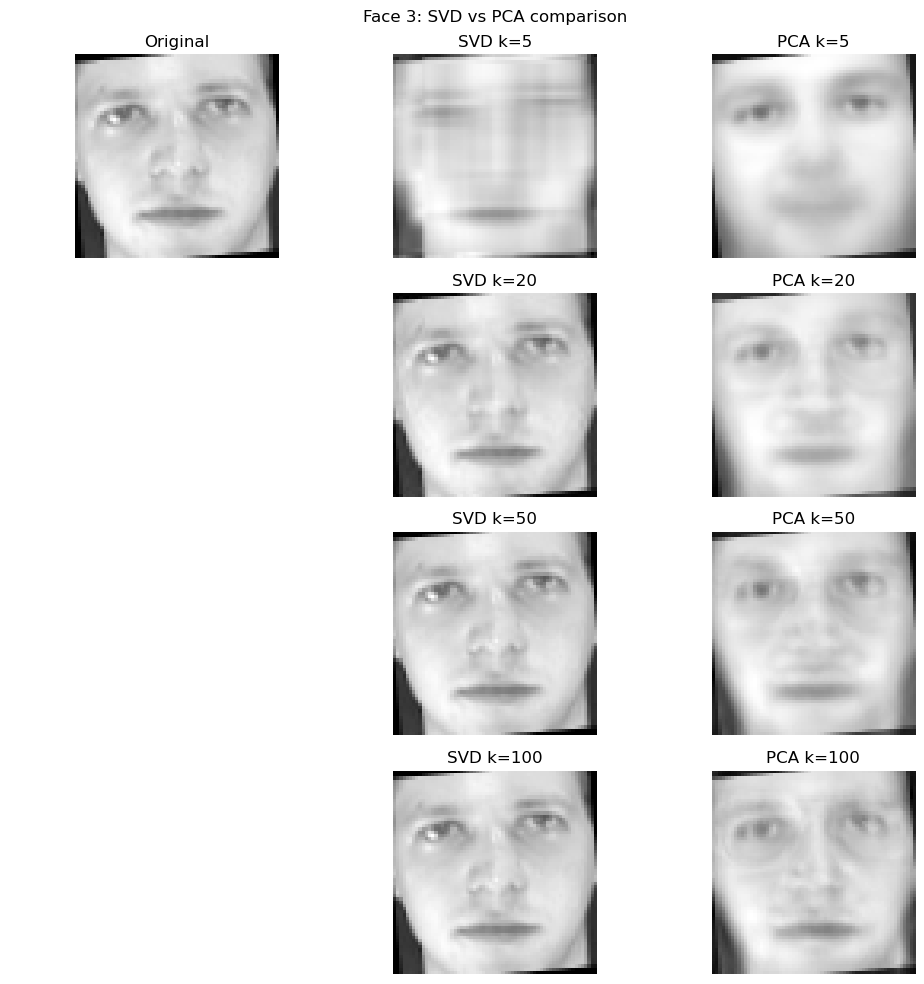

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def svd_reconstruct(img, k):
    U, S, VT = np.linalg.svd(img, full_matrices=False)
    return (U[:, :k] @ np.diag(S[:k]) @ VT[:k, :])

def compression_details(img, k, method="SVD"):
    m, n = img.shape
    original_size = m * n
    if method == "SVD":
        compressed_size = k * (m + n + 1)
    elif method == "PCA":
        # PCA stores mean + components + projections
        compressed_size = k * (m + n)
    ratio = compressed_size / original_size
    return original_size, compressed_size, ratio


# Load Olivetti Faces dataset
faces = np.load("dataset/augmented_faces.npy")
print("Dataset shape:", faces.shape)

num_images, h, w = faces.shape
faces_flat = faces.reshape(num_images, -1)

# Fit PCA on dataset
pca = PCA(n_components=100)
faces_pca = pca.fit_transform(faces_flat)
faces_recon = pca.inverse_transform(faces_pca).reshape(num_images, h, w)

sample_imgs = [0, 1, 2]   # indices of faces to compare
ks = [5, 20, 50, 100]

for idx in sample_imgs:
    img = faces[idx]
    print(f"\n=== Face {idx+1} ===")
    print(f"Original size: {h} x {w} = {h*w} values")

    fig, axes = plt.subplots(len(ks), 3, figsize=(10, 10))
    for row, k in enumerate(ks):
        # SVD reconstruction
        svd_img = svd_reconstruct(img, k)
        orig, comp, ratio = compression_details(img, k, method="SVD")
        print(f"SVD k={k}: Compressed Size={comp}, Ratio={ratio:.4f}")

        # PCA reconstruction (already precomputed with 100 comps)
        pca_tmp = PCA(n_components=k)
        pca_tmp.fit(faces_flat)
        img_proj = pca_tmp.transform(img.reshape(1, -1))
        pca_img = pca_tmp.inverse_transform(img_proj).reshape(h, w)
        orig, comp, ratio = compression_details(img, k, method="PCA")
        print(f"PCA k={k}: Compressed Size={comp}, Ratio={ratio:.4f}")

        # Plot Original / SVD / PCA
        if row == 0:
            axes[row, 0].imshow(img, cmap="gray")
            axes[row, 0].set_title("Original")
        else:
            axes[row, 0].axis("off")

        axes[row, 1].imshow(svd_img, cmap="gray")
        axes[row, 1].set_title(f"SVD k={k}")

        axes[row, 2].imshow(pca_img, cmap="gray")
        axes[row, 2].set_title(f"PCA k={k}")

        for ax in axes[row]:
            ax.axis("off")

    plt.suptitle(f"Face {idx+1}: SVD vs PCA comparison")
    plt.tight_layout()
    plt.show()


Inference

- Both SVD and PCA reconstruct images well with fewer dimensions.

- With small k, reconstructed faces look blurry but still recognizable (global structure preserved).

- With larger k, fine details (eyes, mouth, hair) return.

- PCA is basically SVD on centered data, so results are similar.

- PCA is preferable when you care about variance explanation and interpretation.

- SVD is more direct for matrix factorization and compression.